In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import json
from scipy import stats
from sqlalchemy.sql import operators, extract

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from sqlalchemy import desc

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
# Use Inspector to print the column names & types for table 'measurement'
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
# Use Inspector to print the column names & types for table 'measurement'
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# Use 'engine.execute to select and display first 10 rows of table of measurement'
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [10]:
# Use 'engine.execute to select and display first 10 rows of table of station'
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [11]:
# Reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

In [12]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [13]:
# Save references to each table
# Map measurement class
measurement = Base.classes.measurement

# Map station class
station = Base.classes.station

In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

### Precipitation Analysis
* Design a query to retrieve the last 12 months of precipitation data.
* Select only the date and prcp values.
* Load the query results into a Pandas DataFrame and set the index to the date column
* Sort the DataFrame values by date.
* Plot the results using the DataFrame plot method.

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Select last data point in the database
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [16]:
# Calculate the date 1 year ago from the last data point in the database
previous_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(previous_year)

2016-08-23


In [17]:
# Perform a query to retrieve the date and precipitation scores
prcp_data = session.query(measurement.date, measurement.prcp).\
            filter(measurement.date >= previous_year).\
            order_by(measurement.date).all()
print(prcp_data)

[('2016-08-23', 0.0), ('2016-08-23', 0.15), ('2016-08-23', 0.05), ('2016-08-23', None), ('2016-08-23', 0.02), ('2016-08-23', 1.79), ('2016-08-23', 0.7), ('2016-08-24', 0.08), ('2016-08-24', 2.15), ('2016-08-24', 2.28), ('2016-08-24', None), ('2016-08-24', 1.22), ('2016-08-24', 2.15), ('2016-08-24', 1.45), ('2016-08-25', 0.08), ('2016-08-25', 0.08), ('2016-08-25', 0.0), ('2016-08-25', 0.0), ('2016-08-25', 0.21), ('2016-08-25', 0.06), ('2016-08-25', 0.11), ('2016-08-26', 0.0), ('2016-08-26', 0.03), ('2016-08-26', 0.02), ('2016-08-26', 0.04), ('2016-08-26', 0.0), ('2016-08-26', 0.01), ('2016-08-27', 0.0), ('2016-08-27', 0.18), ('2016-08-27', 0.02), ('2016-08-27', 0.0), ('2016-08-27', 0.12), ('2016-08-27', None), ('2016-08-28', 0.01), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.6), ('2016-08-28', 2.07), ('2016-08-29', 0.0), ('2016-08-29', 0.17), ('2016-08-29', 0.04), ('2016-08-29', None), ('2016-08-29', 0.0), ('2016-08-29', 0.35), ('2016-08-29', 0.9),

In [18]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_data)
prcp_df = prcp_df.set_index('date')
prcp_df = prcp_df.rename(columns = {"prcp":"Precipitation"})
prcp_df.head()

,Precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


In [19]:
# Drop Null value in the DataFrame
prcp_df_clean = prcp_df.dropna()
prcp_df_clean

# Sort the dataframe by date
prcp_df_final = prcp_df_clean.sort_index(ascending=True)
prcp_df_final.head()

,Precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


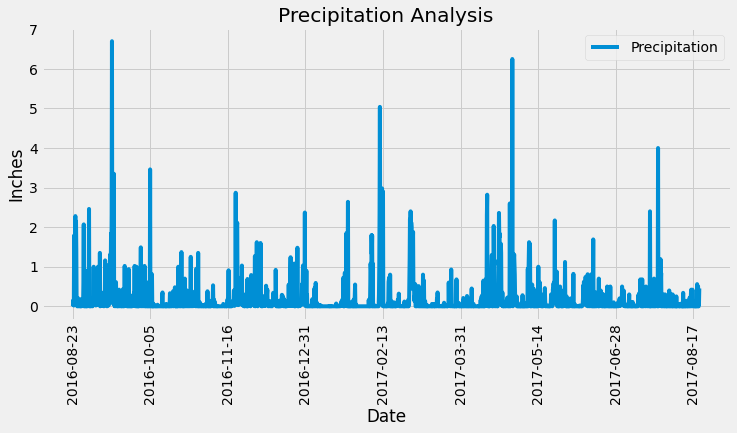

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df_final.plot(legend = 'Precipitation', figsize=(11,5))
plt.xticks(rotation=90)
plt.title("Precipitation Analysis")
plt.ylabel("Inches")
plt.xlabel("Date")
plt.savefig("Output/fig1")
plt.show()

### Station Analysis
* Design a query to calculate the total number of stations.
* Design a query to find the most active stations.
    * List the stations and observation counts in descending order.
    * Which station has the highest number of observations?
* Design a query to retrieve the last 12 months of temperature observation data (TOBS).
    * Filter by the station with the highest number of observations.
    * Plot the results as a histogram with bins=12.

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_summary = prcp_df_final.describe()
prcp_summary

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [22]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(station).count()
print(f"Station Count: {station_count}")

Station Count: 9


In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_station_count = session.query(measurement.station, func.count(measurement.station))\
                        .group_by(measurement.station)\
                        .order_by(func.count(measurement.station).desc()).all()
most_station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

# Identify most active station
most_active_station = most_station_count[0][0]
most_active_station

# Calculate lowest temperature record for most active station
lowest_temp = session.query(func.min(measurement.tobs))\
                .filter(measurement.station == most_active_station).all()

# Calculate highest temperature record for most active station
highest_temp = session.query(func.max(measurement.tobs))\
                .filter(measurement.station == most_active_station).all()

# Calculate averange temperature record for most active station
average_temp = session.query(func.avg(measurement.tobs))\
                .filter(measurement.station == most_active_station).all()

print(f"The most active station is {most_active_station}.")
print(f"The lowest temperature record is {lowest_temp[0][0]} degree.")
print(f"The highest temperature record is {highest_temp[0][0]} degree.")
print(f"The average temperature record is {round(average_temp[0][0],2)} degree.")

The most active station is USC00519281.
The lowest temperature record is 54.0 degree.
The highest temperature record is 85.0 degree.
The average temperature record is 71.66 degree.


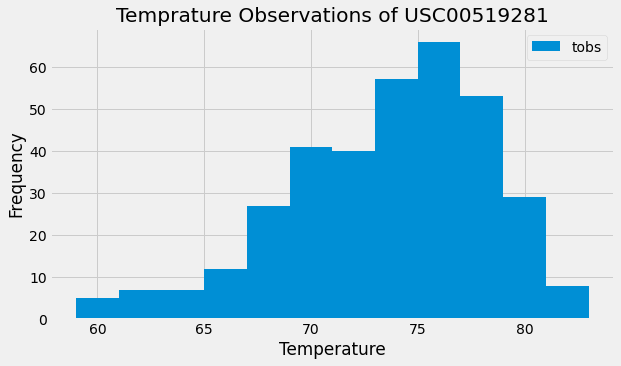

In [25]:
# Choose the station with the highest number of temperature observations.
highest_tob_count = session.query(measurement.station, func.count(measurement.tobs))\
                            .group_by(measurement.station)\
                            .order_by(func.count(measurement.tobs).desc()).all()
highest_tob_station = highest_tob_count[0][0]
highest_tob_station

# Query the last 12 months of temperature observation data for this station 
last_year_tob_data = session.query(measurement.date, measurement.station, measurement.tobs)\
                        .filter(measurement.station == highest_tob_station)\
                        .filter(measurement.date >= previous_year).all()
last_year_tob_data

# Create a dataframe with last_year_tob_data
last_year_tob_df = pd.DataFrame(last_year_tob_data)
last_year_tob_df

# Plot the last_year_tob_df as a histogram
tobs_histrogram = last_year_tob_df.plot(kind='hist', bins=12, figsize=(9,5))
plt.xlabel('Temperature')
plt.title('Temprature Observations of USC00519281')
plt.savefig("Output/fig2")
plt.show()

## Bonus Challenge Assignment

### Temperature Analysis I
* Identify the average temperature in June at all stations across all available years in the dataset. Do the same for December temperature.
* Use the t-test to determine whether the difference in the means, if any, is statistically significant. Will you use a paired t-test, or an unpaired t-test? Why?

In [26]:
# Identify the average temperature in June at all stations across all available years in the dataset. 
#Do the same for December temperature.

# Calculate average temperature for June at all stations for all years
avg_June = session.query(func.avg(measurement.tobs))\
                        .filter(extract('month', measurement.date) == "06").all()
avg_June

[(74.94411764705882)]

In [27]:
# Calculate average temperature for December at all stations for all years
avg_Dec = session.query(func.avg(measurement.tobs))\
                        .filter(extract('month', measurement.date) == "12").all()
avg_Dec

[(71.04152933421226)]

In [28]:
# Create DataFrames for Avg Temperature of June
avg_June_data = session.query(measurement.date, measurement.tobs)\
                .filter(extract('month', measurement.date) == "06").all()
avg_June_df = pd.DataFrame(avg_June_data, columns=["Date", "TOBS"])
avg_June_df

,Date,TOBS
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [29]:
# Create DataFrames for Avg Temperature of December
avg_Dec_data = session.query(measurement.date, measurement.tobs)\
                .filter(extract('month', measurement.date) == "12").all()
avg_Dec_df = pd.DataFrame(avg_Dec_data, columns=["Date", "TOBS"])
avg_Dec_df

,Date,TOBS
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [30]:
# Calcuate T-test stats for average temperation between June & December
stats.ttest_ind(avg_June_df['TOBS'], avg_Dec_df['TOBS'])

Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)

### Temperature Analysis II
* The starter notebook contains a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d. The function will return the minimum, average, and maximum temperatures for that range of dates.
* Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e., use "2017-01-01" if your trip start date was "2018-01-01").
* Plot the min, avg, and max temperature from your previous query as a bar chart.
    * Use the average temperature as the bar height.
    * Use the peak-to-peak (TMAX-TMIN) value as the y error bar (YERR).

In [31]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and returna the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2016-03-26', '2016-04-08'))

[(62.0, 72.02173913043478, 82.0)]


In [32]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start_date = '2015-03-26'
end_date = '2015-04-08'
temp_result = calc_temps(start_date, end_date)
temp_result

[(63.0, 72.9080459770115, 80.0)]

In [33]:
# Create a DataFrame for chosen dates data
temp_result_df = pd.DataFrame(temp_result, columns = ['Min', 'Avg', 'Max'])
temp_result_df

,Min,Avg,Max
0,63.0,72.908046,80.0


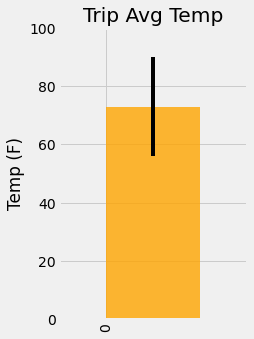

In [34]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

yerr_data = [temp_result_df['Max'] - temp_result_df['Min']]
temp_result_df.plot(kind='bar', y='Avg', yerr=yerr_data, color="orange",
                      alpha=0.8, figsize=(3,5), align='edge', legend='', title='Trip Avg Temp')
plt.ylabel("Temp (F)")
plt.ylim(0,100)
plt.savefig("Output/fig3")
plt.show()

### Daily Rainfall Average
* Calculate the rainfall per weather station using the previous year's matching dates.
* Calculate the daily normals. Normals are the averages for the min, avg, and max temperatures.
* You are provided with a function called daily_normals that will calculate the daily normals for a specific date. This date string will be in the format %m-%d. Be sure to use all historic TOBS that match that date string.
* Create a list of dates for your trip in the format %m-%d. Use the daily_normals function to calculate the normals for each date string and append the results to a list.
* Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.
* Use Pandas to plot an area plot (stacked=False) for the daily normals.

In [35]:
# Calculate the total amount of rainfall per weather station for your trip dates using 
# the previous year's matching dates.Sort this in descending order by precipitation amount 
# and list the station, name, latitude, longitude, and elevation

# Collect all station data with total amount of rainfall
rainfall_station_data = (session.query(station.station, station.name, station.latitude, \
                                      station.longitude, station.elevation, \
                                      func.sum(measurement.prcp),)\
                         .filter(measurement.station == station.station,
                                 measurement.date.between('2015-03-26', '2015-04-08'),)
                         .group_by(station.station)\
                         .order_by(func.sum(measurement.prcp).desc()).all())
rainfall_station_data

[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  6.37),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  2.61),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  2.38),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 1.56),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.72),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.7100000000000001),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.03),
 ('USC00511918',
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9,
  0.0)]

In [36]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [37]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
trip_start_date = '2015-03-26'
trip_end_date = '2015-04-08'

# Use the start and end date to create a range of dates
date_range = pd.date_range(trip_start_date, trip_end_date)
date_range

DatetimeIndex(['2015-03-26', '2015-03-27', '2015-03-28', '2015-03-29',
               '2015-03-30', '2015-03-31', '2015-04-01', '2015-04-02',
               '2015-04-03', '2015-04-04', '2015-04-05', '2015-04-06',
               '2015-04-07', '2015-04-08'],
              dtype='datetime64[ns]', freq='D')

In [38]:
# Stip off the year and save a list of %m-%d strings
date_range_new = pd.date_range(trip_start_date, trip_end_date).strftime('%m-%d')
date_range_new

Index(['03-26', '03-27', '03-28', '03-29', '03-30', '03-31', '04-01', '04-02',
       '04-03', '04-04', '04-05', '04-06', '04-07', '04-08'],
      dtype='object')

In [39]:
# Loop through the list of %m-%d strings and calculate the normals for each date
date_range_normals = [daily_normals(date) for date in date_range_new]
date_range_normals

[[(64.0, 71.38, 80.0)],
 [(63.0, 71.53846153846153, 80.0)],
 [(59.0, 71.51785714285714, 82.0)],
 [(58.0, 71.35714285714286, 77.0)],
 [(62.0, 72.17543859649123, 79.0)],
 [(61.0, 71.875, 79.0)],
 [(60.0, 71.87931034482759, 80.0)],
 [(53.0, 71.82142857142857, 79.0)],
 [(55.0, 72.2280701754386, 78.0)],
 [(58.0, 72.01639344262296, 78.0)],
 [(61.0, 72.28813559322033, 80.0)],
 [(67.0, 71.57142857142857, 77.0)],
 [(63.0, 71.10526315789474, 78.0)],
 [(66.0, 72.10526315789474, 77.0)]]

In [40]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` 
# range as the `date` index
date_range_normals_new = [item for sublist in date_range_normals for item in sublist]
date_range_normals_df = pd.DataFrame(date_range_normals_new, columns=['tmin', 'tavg', 'tmax'],\
                                    index=date_range)
date_range_normals_df.index.name = "date"
date_range_normals_df

,tmin,tavg,tmax
date,,,
2015-03-26,64.0,71.380000,80.0
2015-03-27,63.0,71.538462,80.0
2015-03-28,59.0,71.517857,82.0
2015-03-29,58.0,71.357143,77.0
2015-03-30,62.0,72.175439,79.0
2015-03-31,61.0,71.875000,79.0
2015-04-01,60.0,71.879310,80.0
2015-04-02,53.0,71.821429,79.0
2015-04-03,55.0,72.228070,78.0


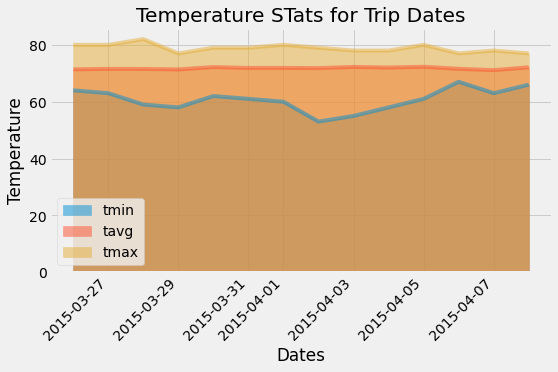

In [41]:
# Plot the daily normals as an area plot with `stacked=False`
date_range_normals_df.plot(kind="area", stacked=False, x_compat=True, alpha=0.5, figsize=(8,5),\
                          title="Temperature STats for Trip Dates")
plt.xticks(rotation=45)
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.savefig("Output/fig4")
plt.show()